<a href="https://colab.research.google.com/github/vibhahugar/MLlab/blob/main/WEEK5ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dev_data/insurance_data.csv')

In [ ]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [ ]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


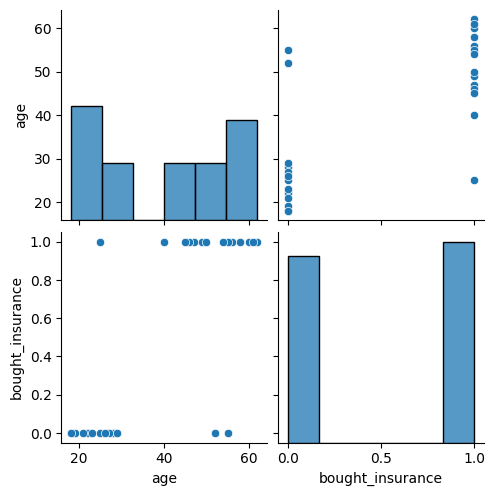

In [ ]:
sns.pairplot(df)

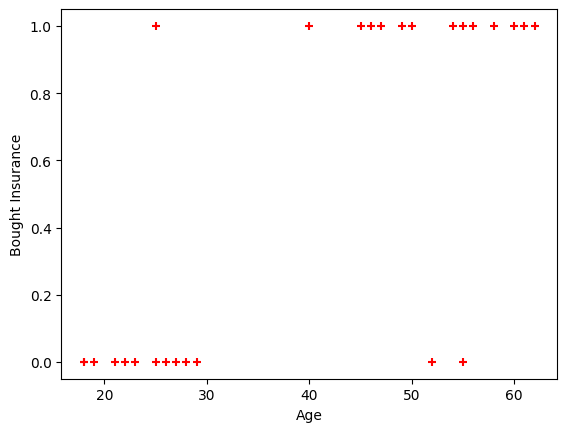

X_test:
    age
18   19
17   58
12   27
25   54
15   55
16   25
13   29
2    47
1    25
23   45
14   49

X_test after splitting:
    age
18   19
17   58
12   27
25   54
15   55
16   25
13   29
2    47
1    25
23   45
14   49

Predicted values:
[0 1 0 1 1 0 0 1 0 1 1]

Probabilities:
[[0.96882706 0.03117294]
 [0.14108671 0.85891329]
 [0.91381119 0.08618881]
 [0.21950262 0.78049738]
 [0.19734069 0.80265931]
 [0.93276421 0.06723579]
 [0.89014476 0.10985524]
 [0.41883769 0.58116231]
 [0.93276421 0.06723579]
 [0.48533331 0.51466669]
 [0.35516554 0.64483446]]

Model Score: 0.9090909090909091

Accuracy: 0.9090909090909091


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have a DataFrame named df with columns 'age' and 'bought_insurance'

# Scatter plot
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.show()

# Perform the split with a random number (random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.6, random_state=3)


# Display X_test
print("X_test:")
print(X_test)

# Model creation and fitting
model = LogisticRegression()
model.fit(X_train, y_train)

# Display X_test again
print("\nX_test after splitting:")
print(X_test)

# Predictions
y_predicted = model.predict(X_test)

# Predict probabilities
probabilities = model.predict_proba(X_test)

# Model score
score = model.score(X_test, y_test)

# Display predicted values
print("\nPredicted values:")
print(y_predicted)

# Display probabilities
print("\nProbabilities:")
print(probabilities)

# Display model score
print("\nModel Score:", score)

# Accuracy function
def calculate_accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_predicted)
print("\nAccuracy:", accuracy)


**ANALYZE THROUGH LINEAR REGRESSION**

In [ ]:
model.coef_

array([[0.12335856]])

In [ ]:
model.intercept_

array([-4.87081951])

**ANALYZE THROUGH SIGMOID FUNCTION**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
  z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
  y = sigmoid(z)
  return y

In [ ]:
# Check for age = 35
age = 35
predicted_probability_35 = prediction_function(age)
print("Predicted probability for age 35:", predicted_probability_35)

# Check for age = 43
age = 43
predicted_probability_43 = prediction_function(age)
print("Predicted probability for age 43:", predicted_probability_43)


Predicted probability for age 35: 0.4850044983805899
Predicted probability for age 43: 0.568565299077705


In [ ]:
# function to check accuracy
def check_accuracy(df):
    correct_predictions = 0
    total_samples = len(df)

    for index, row in df.iterrows():
        age = row['age']
        actual_label = row['bought_insurance']
        predicted_probability = prediction_function(age)

        # Convert probability to binary prediction
        if predicted_probability >= 0.5:
            predicted_label = 1
        else:
            predicted_label = 0

        if predicted_label == actual_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy

# Call the function to check accuracy
accuracy = check_accuracy(df)
print("Accuracy:", accuracy)


Accuracy: 0.8888888888888888
